In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<ipython-input-2-e86b52784e19>:37: RuntimeWarning: divide by zero encountered in log
  log_corrected = c * np.log(1 + image)


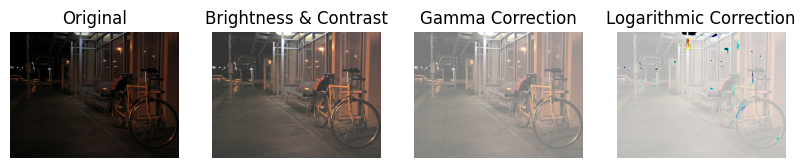

In [2]:
# Función para cargar una imagen desde un archivo
def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error: No se pudo cargar la imagen de {file_path}")
    else:
        return image

# Función para ajustar el brillo y el contraste
def adjust_brightness_contrast(image, alpha=1.0, beta=0):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Función para mostrar imágenes
def display_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Función para guardar imágenes
def save_image(file_path, image):
    cv2.imwrite(file_path, image)

# Función para la corrección gamma
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Función para la corrección logarítmica
def logarithmic_correction(image, c=1.0):
    c = 255 / np.log(1 + np.max(image))
    log_corrected = c * np.log(1 + image)
    return np.array(log_corrected, dtype=np.uint8)

# Código para cargar y ajustar la imagen
image_path = '/content/bici.png'
image = load_image(image_path)
if image is not None:
    adjusted_image = adjust_brightness_contrast(image, alpha=1.5, beta=50)
    gamma_corrected = gamma_correction(adjusted_image, gamma=2.2)
    log_corrected = logarithmic_correction(adjusted_image, c=1.0)

    # Mostrar las imágenes
    display_images([image, adjusted_image, gamma_corrected, log_corrected],
                   ['Original', 'Brightness & Contrast', 'Gamma Correction', 'Logarithmic Correction'])

    # Guardar las imágenes corregidas
    save_image('/content/bici_ajustada.png', adjusted_image)
    save_image('/content/bici_gamma_corrected.png', gamma_corrected)
    save_image('/content/bici_log_corrected.png', log_corrected)
else:
    print("La carga de la imagen falló, no se puede proceder con los ajustes.")


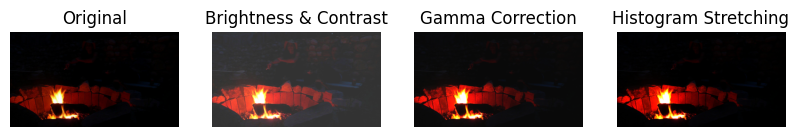

In [3]:
# Función para la corrección gamma
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Función para el estiramiento del histograma
def histogram_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return stretched

# Carga de imagen
image2_path = '/content/fogata.jpg'
image2 = load_image(image2_path)

if image2 is not None:
    # Ajustar brillo y contraste
    alpha = 1.5  # Control de contraste
    beta = 50    # Control de brillo
    adjusted_image2 = adjust_brightness_contrast(image2, alpha, beta)

    # Aplicar corrección gamma
    gamma_value = 0.5
    gamma_corrected = gamma_correction(adjusted_image2, gamma_value)

    # Aplicar estiramiento del histograma
    histogram_stretched = histogram_stretching(gamma_corrected)

    # Mostrar y guardar las imágenes
    display_images([image2, adjusted_image2, gamma_corrected, histogram_stretched],
                   ['Original', 'Brightness & Contrast', 'Gamma Correction', 'Histogram Stretching'])
    save_image('/content/fogata_ajustada.jpg', histogram_stretched)
else:
    print("La carga de la imagen falló, no se puede proceder con los ajustes.")


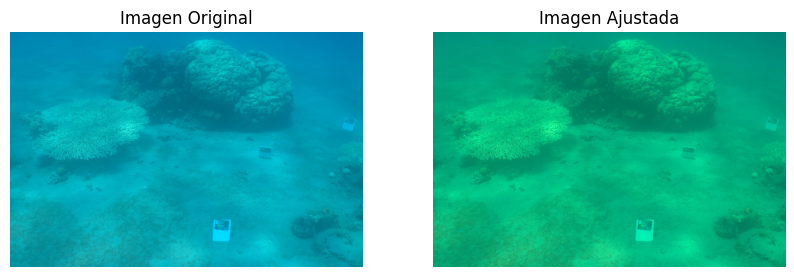

In [ ]:
# Función para equilibrar los canales de color de la imagen
def color_balance(image, balance_factor):
    # Suponiendo que el balance_factor es un arreglo [b, g, r]
    # donde b, g, y r son los factores para los canales azul, verde y rojo respectivamente
    channels = cv2.split(image)
    channels = [cv2.multiply(channels[i], balance_factor[i]) for i in range(3)]
    balanced_image = cv2.merge(channels)
    return balanced_image

# Carga de la tercera imagen
image3_path = '/content/subacuatica.jpg'
image3 = load_image(image3_path)

# Se verifica si la imagen se cargó correctamente
if image3 is not None:
    # Ajustar el balance de color
    # Aumentamos los canales verde y rojo para reducir el dominante azul
    balance_factor = [0.7, 1.1, 1.1]  # Ejemplo de factores, ajusta según sea necesario
    adjusted_image3 = color_balance(image3, balance_factor)

    # Mostrar las imágenes
    display_images(image3, adjusted_image3)

    # Guardar la imagen ajustada
    adjusted_image3_path = '/content/subacuatica_ajustada.jpg'
    cv2.imwrite(adjusted_image3_path, adjusted_image3)
else:
    print("La carga de la imagen falló, no se puede proceder con el balance de color.")


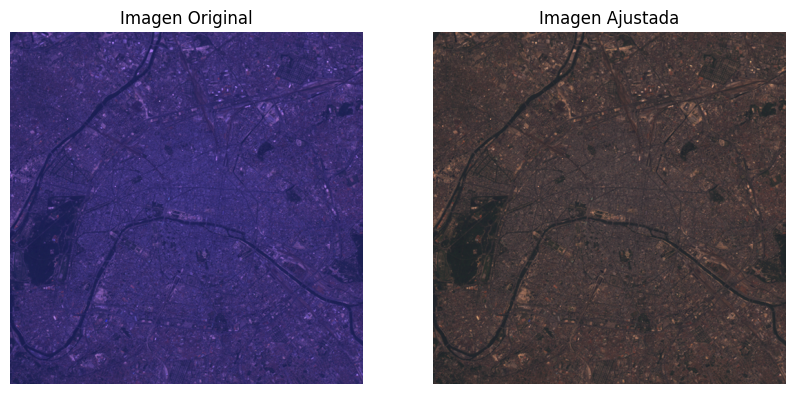

In [5]:
# Función para cargar la imagen desde un archivo
def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED para asegurarnos de cargar la imagen tal como es
    if image is None:
        print(f"Error: No se pudo cargar la imagen de {file_path}")
    return image

# Función para ajustar el balance de color
def adjust_color_balance(image, blue_factor, green_factor, red_factor):
    (b, g, r) = cv2.split(image)
    b = cv2.multiply(b, blue_factor)
    g = cv2.multiply(g, green_factor)
    r = cv2.multiply(r, red_factor)
    return cv2.merge((b, g, r))

# Función para mostrar imágenes
def display_images(original, adjusted):
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(adjusted_rgb)
    plt.title('Imagen Ajustada')
    plt.axis('off')

    plt.show()

# Cargar la imagen TIFF
image4_path = '/content/mapa.tif'
image4 = load_image(image4_path)

# Verificar si la imagen se cargó correctamente
if image4 is not None:
    # Ajustar el balance de color
    adjusted_image4 = adjust_color_balance(image4, 0.5, 1.2, 1.2)

    # Mostrar las imágenes
    display_images(image4, adjusted_image4)

    # Guardar la imagen ajustada en formato PNG ya que TIFF podría no ser bien soportado
    adjusted_image4_path = '/mnt/data/adjusted_image4.png'
    cv2.imwrite(adjusted_image4_path, adjusted_image4)
else:
    print("La carga de la imagen falló, no se puede proceder con el ajuste de color.")
